In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('../balancedData.csv')

In [5]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,30,13.4,22.9,0.6,7.0,11.3,4.0,44.0,5.0,3.0,...,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,False,False,12
1,30,7.4,25.1,0.0,6.0,6.7,2.0,44.0,0.0,6.0,...,25.0,1010.6,1007.8,1.0,2.0,17.2,24.3,False,False,12
2,30,12.9,25.7,0.0,2.4,12.2,5.0,46.0,5.0,6.0,...,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,False,False,12
3,30,9.2,28.0,0.0,2.2,13.3,11.0,24.0,13.0,14.0,...,16.0,1017.6,1012.8,6.0,7.0,18.1,26.5,False,False,12
4,30,17.5,32.3,1.0,3.8,0.0,4.0,41.0,12.0,0.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193048,15,14.4,17.2,1.5,3.4,11.3,10.0,68.5,11.0,12.0,...,83.0,1024.1,1022.4,6.0,7.0,16.3,16.5,True,True,8
193049,9,9.3,21.7,0.0,5.4,0.0,4.0,39.0,1.0,10.0,...,72.0,1016.8,1014.5,7.0,3.0,16.4,20.7,False,True,5
193050,20,15.7,23.3,0.0,11.4,0.0,0.0,31.0,0.0,5.0,...,80.0,1022.4,1018.5,1.0,5.0,20.8,20.8,False,True,5
193051,36,13.5,32.7,0.0,7.2,12.7,1.0,65.0,12.0,5.0,...,16.0,1009.6,1004.9,1.0,8.0,20.8,30.9,False,True,1


In [6]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [9]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score
}

In [10]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)

In [11]:
grid.fit(X_train, y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hp\AppData\Local\Pro

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [12]:
grid.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 200,
 'oob_score': False}

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[30684  2496]
 [ 2629 22107]]


              precision    recall  f1-score   support

       False       0.92      0.92      0.92     33180
        True       0.90      0.89      0.90     24736

    accuracy                           0.91     57916
   macro avg       0.91      0.91      0.91     57916
weighted avg       0.91      0.91      0.91     57916



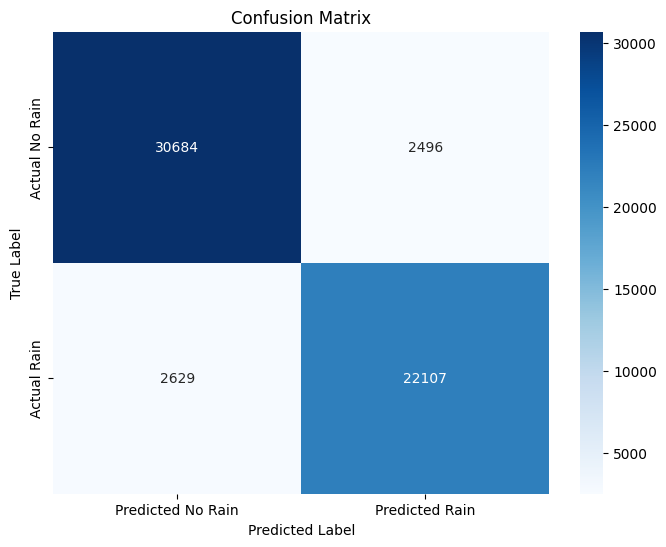

In [14]:
model_preds = grid.predict(X_test)
conf_mat = confusion_matrix(y_test, model_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

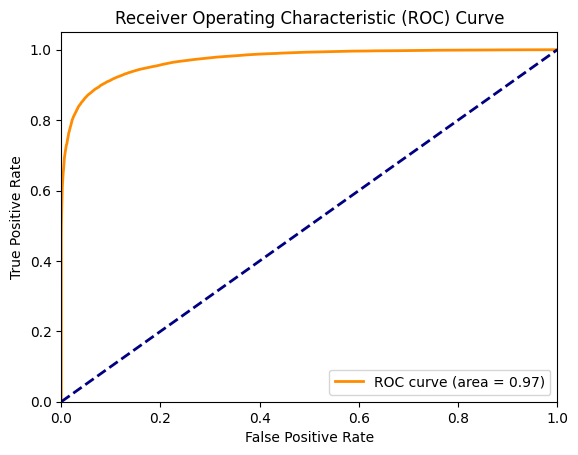

In [15]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = grid.predict_proba(X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()